# Project: No-Show Appiontments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project data that has been collected that contains information of 100k medical appointments in Brazil will be used to analyse whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● PatientId: The patient id number

● AppointmentID: The patient appointment id number

● Gender: The gender of patient, either male or female
	
● ScheduledDay: Tells us on
what day the patient set up their
appointment.

● AppointmentDay: Tells us on
the day the patient is to show up.

● Age: The age of the patient.

● Neighborhood: Indicates the
location of the hospital.

● Scholarship: Indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Hypertension: If the patient has hypertension or not

● Diabetes: If the patient has Diabetes or not

● Alcoholism: If the patient is an Alcoholic or not
	
● Handcap: if the patient is Handicap or not	

● SMS_received: if the patient receives SMS or not	
	
● No-show ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


The Questions asked in this analysis will be;

1. How many patient showed up or not in a schedule appointment?

2. What features are helpful in showing if a patient will show up for their scheduled appointment?

3. What is the relationship between the dependent variable No_show and all the independent feature?

In [1]:
# importing important libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# reading the dataset
df = pd.read_csv("C://Users//USER//Desktop//Udacity//Project//dataset//noshowappointments-kagglev2-may-2016.csv")

In [3]:
# an overview of the first 10 datasets
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# an overview of the last 10 datasets
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# checking for the number of rows in the dataset
df.shape[0]

110527

### Inference

There are 110527 rows in the dataset

In [6]:
# checking for the number of columns in the dataset
df.shape[1]

14

### Inference

There are 14 columns in the dataset

In [7]:
# checking for the size of the dataset
df.shape

(110527, 14)

### Inference

From the analysis, the dataset has 110527 records of patients medical appointments and 14 features.

In [8]:
# checking for the different data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Inference

The dataset have several types such as float, int and strings

In [9]:
# performing a summary statistics on the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Inference

The summary statistics shows that the records of medical appointments have people who are 115 years of age, however, more people are between the age of 18 and 55.

In [10]:
# checking the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Inference

We can see that the  Handicap feature has four values, the other features have 2 values, 0 and 1 that represents No and Yes of values. 

In [11]:
# checking for missing dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Inference

From the dataset, we see that there there are no missing values, as 0 represents no-missing values in the datasets.

In [12]:
# duplicate rows in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset

In [13]:
# cheching to have more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
# checking for the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

###  Data cleaning 

1. PatientId is stated as Float instead of Integer  and would be converted into int.

2. The Data Type of AppointmentDay and ScheduledDay will be changed to DateTime.

3. The Column names will be corrected with the correct format

4. The 'Patient_id' and 'Appointment_id' will be dropped as they are are not useful

5. The No_show column will be reshaped to enable better analysis

In [15]:
# renaming each column
df.columns = ['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_day',
       'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']

In [16]:
# Converting the PatientId datatype from Float to Integer
df['Patient_id'] = df['Patient_id'].astype('int64')

In [17]:
# Converting Scheduled_day and Appointment_day to 'datetime64[ns]
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day']).dt.date.astype('datetime64[ns]')
df['Appointment_day'] = pd.to_datetime(df['Appointment_day']).dt.date.astype('datetime64[ns]')


In [18]:
# Droping the 'Patient_id' and 'Appointment_id' as they are just some system genrated numbers.
df.drop(['Patient_id', 'Appointment_id'], axis=1, inplace=True)

In [19]:
# changing the No_show colunm to reflect according
df['No_show'] = df['No_show'].replace({'Yes':'No','No':'Yes'})

### Inference

1. PatientId stated as Float instead of Integer was be converted into int data type.

2. The Data Type of AppointmentDay and ScheduledDay was changed to DateTime.

3. The Column names was be corrected with the right format

4. The 'Patient_id' and 'Appointment_id' was  dropped as they are are not useful

5. The No_show column was reshaped to enable better analysis

In [20]:
# checking to see if changes is reflected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   Scheduled_day    110527 non-null  datetime64[ns]
 2   Appointment_day  110527 non-null  datetime64[ns]
 3   Age              110527 non-null  int64         
 4   Neighbourhood    110527 non-null  object        
 5   Scholarship      110527 non-null  int64         
 6   Hypertension     110527 non-null  int64         
 7   Diabetes         110527 non-null  int64         
 8   Alcoholism       110527 non-null  int64         
 9   Handicap         110527 non-null  int64         
 10  SMS_received     110527 non-null  int64         
 11  No_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [21]:
# an overview of the first 3 rows of the dataset to confirm changes
df.head(3)

,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. How many patient show up or not in a schedule appointment?

In [22]:
# checking for the column names
df.columns

Index(['Gender', 'Scheduled_day', 'Appointment_day', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')

In [23]:
# how many patient show up or not in a schedule appointment?
df.No_show.value_counts() 

Yes    88208
No     22319
Name: No_show, dtype: int64

Text(0.5, 1.0, 'Distribution of Patient who show up or not')

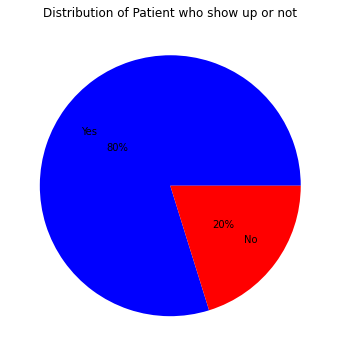

In [24]:
# plotting to see how many patient showed up or not in a schedule appointment
plt.figure(figsize=(6,6))
plt.pie(x=[88208, 22319], labels=['Yes',
'No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Patient who show up or not')

### Inference

We can see that the patient that showed up is 88208 which is 80% compared to the patient that did not show up representing 20%.

### Research Question 2. What features are helpful in showing if a patient will show up for their scheduled appointment?

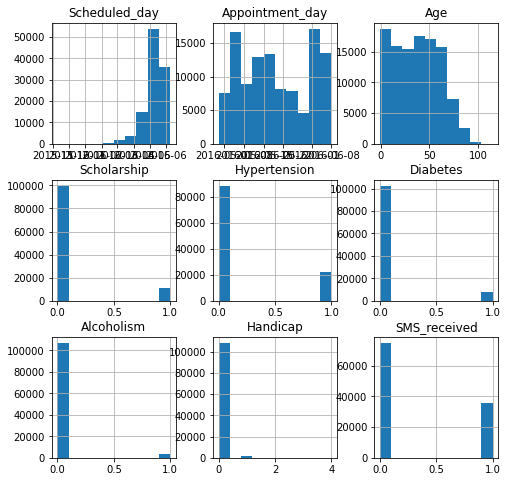

In [25]:
# plotting some features to gain insights
df.hist(figsize= (8,8));

### Age

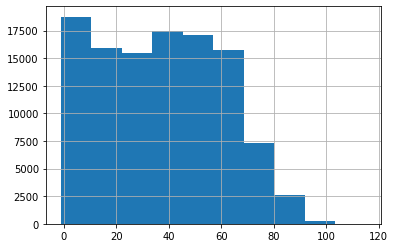

In [26]:
# ploting the age feature
df['Age'].hist();

In [27]:
# unique Age of patient with schedule appointment
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

### Inference

In the code above, we can see that there are patients with Age 0 and -1. Although this does not sound well, as there is no ideal age with a nagative value, however we can check to see more. 

In [28]:
# summary statistics on the age feature
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [29]:
# printing patient with age 0 and -1
print("Age of patient with schedule appointment less than -1 -> {}".format(df[df.Age == -1].shape[0]))
print("Age of patient with schedule appointment equal to 0 -> {}".format(df[df.Age == 0].shape[0]))

Age of patient with schedule appointment less than -1 -> 1
Age of patient with schedule appointment equal to 0 -> 3539


In [30]:
# removing the Age less than 0 
df = df[df.Age >= 0]

Text(0.5, 1.0, 'Scheduled Appointments by Age')

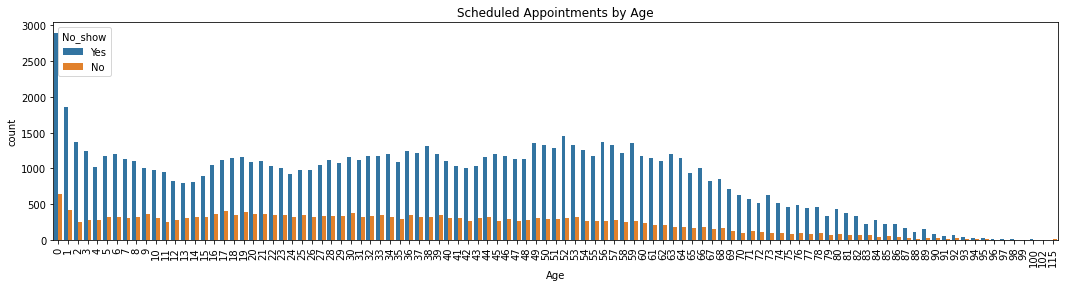

In [31]:
# No show vs Age 
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.No_show)
ax.set_title("Scheduled Appointments by Age")

#### Inference

The summary statistics shows that the records of medical appointments have people who are 115 years of age, however, more people are between the age of 18 and 55. 

Also, the code above, shows that patients with Age 0 are 3539, this can be assumed to be children who are not up to a year. However, patient who are -1 of age doesnt make sense, hence was dropped and assumed to be a mistake.  

### Gender

In [32]:
# patient who are female and those who are male
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

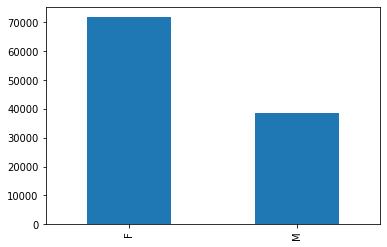

In [33]:
# plotting the gender feature
df['Gender'].value_counts().plot(kind='bar');

In [34]:
# summary statistics on the gender feature
df.Gender.describe()

count     110526
unique         2
top            F
freq       71839
Name: Gender, dtype: object

In [35]:
# Define a function to plot bar plots
def bar_plot(arg1, arg2, arg3, arg4):
    pd.crosstab(arg1, arg2).plot(kind='bar')
    plt.title(arg3)
    plt.xlabel(arg4)
    plt.ylabel('Frequency of No Show')

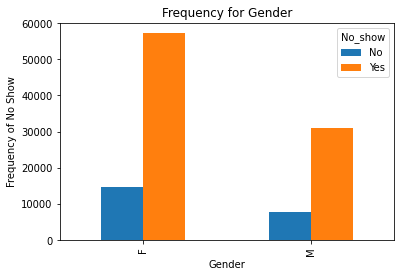

In [36]:
# Calling the bar plot function No show vs  Gender
bar_plot(df.Gender,df.No_show, 'Frequency for Gender', 'Gender')

#### Inference

From the above plots, we can see that out of the 110527 patient with schedule appointments, the female patient are more than the male patients. Also, from the distribution plot, the female patient even though does not have much difference show up more than the male, however, Gender might not be an important factor in determining if a patient comes for a visit or not.

### Neighbourhood

In [37]:
# unique location of patients  
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [38]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Text(0.5, 1.0, 'Scheduled Appointments by Neighbourhood')

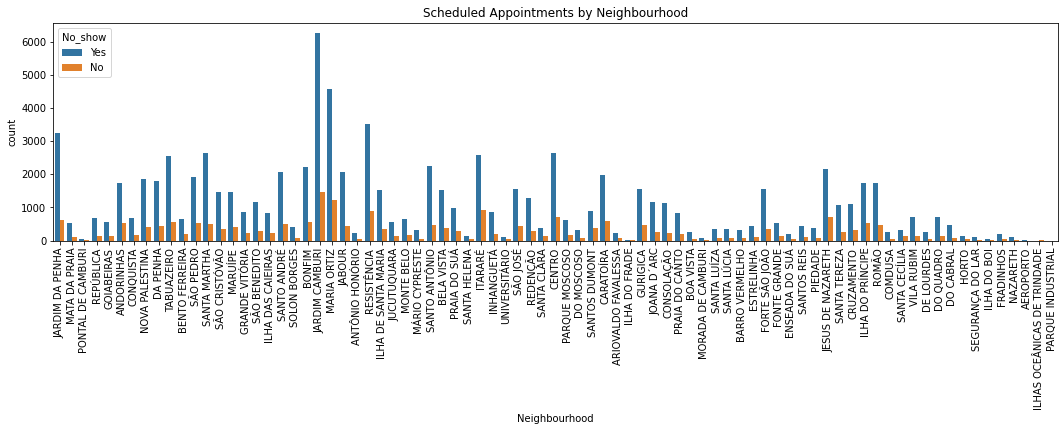

In [39]:
# No show vs Neighbourhood
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Neighbourhood, hue=df.No_show)
ax.set_title("Scheduled Appointments by Neighbourhood")

### Inference

From the above visualization we can see that patients who show up for their scheduled appointment is more than those who do not with regards to their various location/neighbourhood, as such location may not be helpful in showing if a patient will show up for their scheduled appointment.

### Scholarship

In [40]:
# checking the value count for the Scholarship feature
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

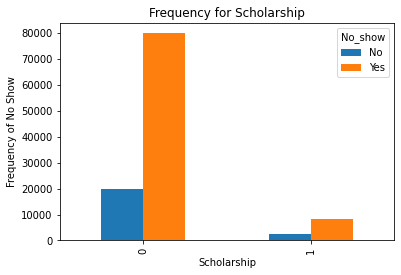

In [41]:
# Calling the bar plot function No show vs Scholarship
bar_plot(df.Scholarship,df.No_show, 'Frequency for Scholarship', 'Scholarship')

Text(0.5, 1.0, 'Distribution of Patient for Scholarship')

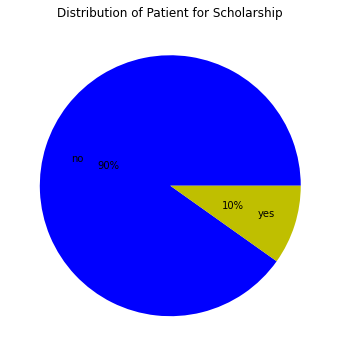

In [42]:
# Distribution plot of Patient for Scholarship
plt.figure(figsize=(6,6))
plt.pie(x=[99666, 10861], labels=['no',
'yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Patient for Scholarship')

### Inference

Where Scholarship represents whether or not the patient is enrolled in the Brasilian welfare program. The above visualization shows  that there are around 99,666 patients without Scholarship and 10,861 patients with Scholarship. 

Also it shows that from the scholarship of patient with scheduled appointment the patients enrolled in the Brasilian welfare program and the patients not enrolled in the Brasilian welfare program Scholarship have almost the same proportion of showing up for the scheduled appointment. Hence, the Scholarship feature could assist in determining if a patient will show up for the scheduled appointment.

### Handicap

In [43]:
# checking the value count for the Handicap feature
df.Handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

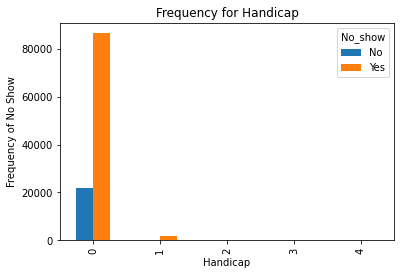

In [44]:
# Calling the bar plot function No show vs Handicap
bar_plot(df.Handicap,df.No_show, 'Frequency for Handicap', 'Handicap')

### Inference

From the above visualization we can see that out of the 108,286 patients who are not Handicap, a good proportion show up are for their scheduled appointment, there are also other various Handicap levels. Hence we say the Handicap feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### Hypertension	

In [45]:
# checking the value count for the Hypertension feature
df.Hypertension.value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

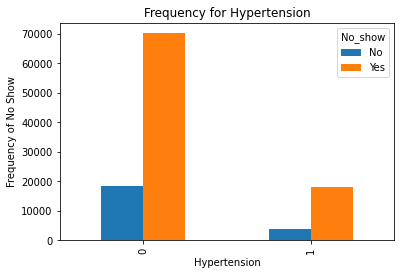

In [46]:
# Calling the bar plot function No show vs Hypertension
bar_plot(df.Hypertension,df.No_show, 'Frequency for Hypertension', 'Hypertension')

Text(0.5, 1.0, 'Distribution of Patient with Hypertension')

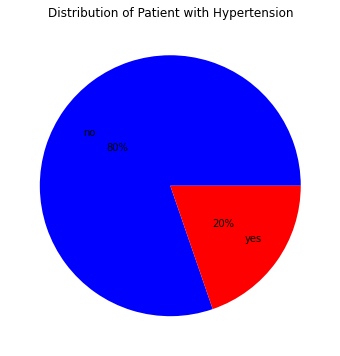

In [47]:
# Distribution plot of Patient with Hypertension
plt.figure(figsize=(6,6))
plt.pie(x=[88725, 21801], labels=['no',
'yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Patient with Hypertension')

### Inference

From the above visualization we can see that out of the 88,725 patients who do not have Hypertension, a good proportion show up are for their scheduled appointment, Also out of the 21,801 patients who have Diabetes, a good proportion also show up are for their scheduled appointment . Hence we say the Hypertension feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### Diabetes

In [48]:
# checking the value count for the Diabetes feature
df.Diabetes.value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

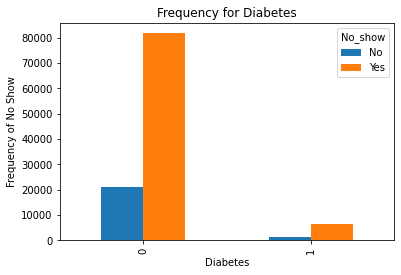

In [49]:
# Calling the bar plot function No show vs Diabetes
bar_plot(df.Diabetes,df.No_show, 'Frequency for Diabetes', 'Diabetes')

Text(0.5, 1.0, 'Distribution of Patient with Diabetes')

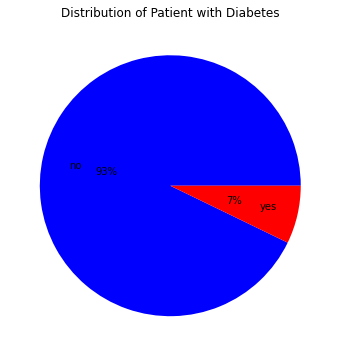

In [50]:
# Distribution plot of Patient with Diabetes
plt.figure(figsize=(6,6))
plt.pie(x=[102584, 7943], labels=['no',
'yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Patient with Diabetes')

### Inference

From the above visualization we can see that out of the 102,584 patients who do not have Diabetes, a good proportion show up are for their scheduled appointment, Also out of the 7,943 patients who have Diabetes, a good proportion also show up are for their scheduled appointment . Hence we say the Diabetes feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### Alcoholism

In [51]:
# checking the value count for the Alcoholism feature
df.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

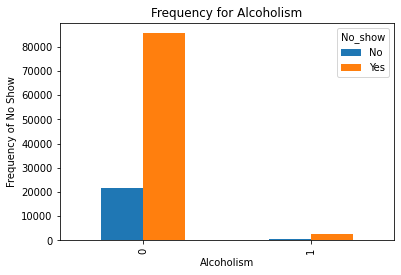

In [52]:
# Calling the bar plot function No show vs Alcoholism
bar_plot(df.Alcoholism,df.No_show, 'Frequency for Alcoholism', 'Alcoholism')

Text(0.5, 1.0, 'Distribution of Patient with Alcoholism')

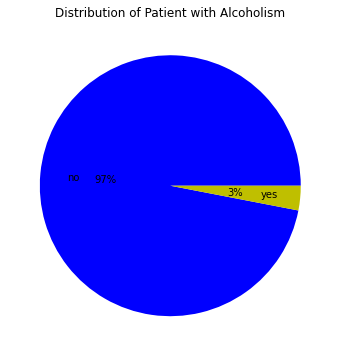

In [53]:
# Distribution plot of Patient with Alcoholism
plt.figure(figsize=(6,6))
plt.pie(x=[107167, 3360], labels=['no',
'yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Patient with Alcoholism')

### Inference

From the above visualization we can see that out of the 107,167 patients without Alcoholism, a good proportion show up are for their scheduled appointment, Also out of the 3,360 patients with  Alcoholism, a good proportion also show up are for their scheduled appointment.

The proportion of patients with and without Alcoholism is the same and  may not help us in determining if a patient will turn up for the visit after taking an appointment.

### SMS_received

In [54]:
# checking the value count for the SMS_received feature
df.SMS_received.value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

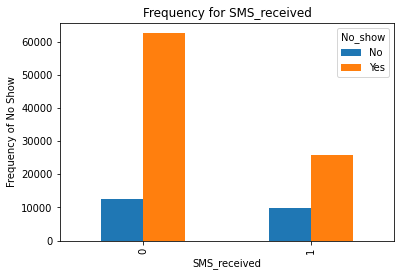

In [55]:
# Calling the bar plot function No show vs SMS_received
bar_plot(df.SMS_received,df.No_show, 'Frequency for SMS_received', 'SMS_received')

Text(0.5, 1.0, 'Distribution of Patient of SMS_received')

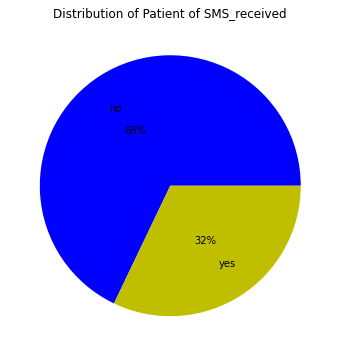

In [56]:
# Distribution plot of Patient of SMS_received
plt.figure(figsize=(6,6))
plt.pie(x=[75045, 35482], labels=['no',
'yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Patient of SMS_received')

### Inference

From the above visualization we can see that out of the 68% patients who do not receive SMS, a good proportion show up are for their scheduled appointment, Also out of the 32% patients who receive SMS, a good proportion also show up are for their scheduled appointment.

This is a bit confusing as Patient who get a scheduled reminder SMS usually tend to visit the hospital more than those who do not. The SMS_received feature though confusing should help us in determining if a patient will turn up for the visit after taking an appointment.

### Research Question 3. What is the relationship between the dependent variable No_show and all the independent feature?

In [57]:
# importing libaries
import sklearn
from sklearn.preprocessing import LabelEncoder

# performing a label encoder on the noshow and gender feature
le_Show = LabelEncoder()
df['No_show'] = le_Show.fit_transform(df['No_show'])
df['Gender'] = le_Show.fit_transform(df['Gender'])

<AxesSubplot:>

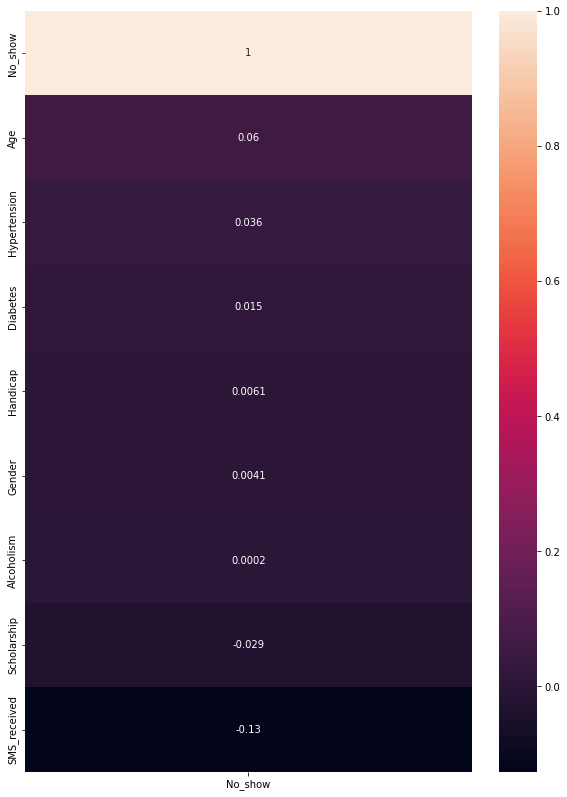

In [58]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
df_corr = df.corr()[['No_show']].sort_values(
    by='No_show', ascending=False)
sns.heatmap(df_corr, annot=True, ax=ax)

### Inference

From the above correlation we can see that the feature Scholarship, Hypertension, Diabetes, Handicap and SMS_received are correlated. Age has the highgest correlation. However Gender and Alcoholism are not correlated with the No_show feature

<a id='conclusions'></a>
## Conclusions

* The data was processed and cleaning was done. PatientId stated as Float instead of Integer was be converted into int data type, data Type of AppointmentDay and ScheduledDay was changed to DateTime, column names was be corrected with the right format 'Patient_id' and 'Appointment_id' were dropped as they are are not useful and the No_show column was reshaped to enable better analysis, the final dataset included 88,208 unique appointments with 22,319 missed appointments. 

* Although some features explain if a patient will show up for their schedule appointment, some explains them better.

*  There are relationship between the No show feature with the Scholarship, Hypertension, Diabetes, Handicap and SMS_received feature. Age has the highgest correlation. However Gender and Alcoholism are not correlated with the No_show feature


### Limitations

* The data can be explored better to bring more insight by performing some statistical infrence and checking for relationships between features. 